In [1]:
import matplotlib.pyplot as plt

In [2]:
path_image = '/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/raw_data/train_dir/train/source_images/2.jpg'
image_test =plt.imread(path_image)

In [3]:
image_test.shape

(482, 400, 3)

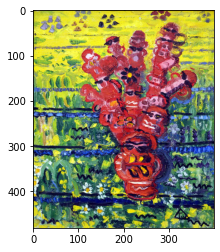

In [4]:
plt.imshow(image_test);

In [5]:
def check_extension(filename): 
    ALLOWED_EXTENSION = ["jpg", "jpeg", "png"]
    extension = filename.split(".")[-1:][0].lower()
    print(extension)
    if extension not in ALLOWED_EXTENSION : 
        return False
    else : 
        return True

In [6]:
check_extension(path_image)

jpg


True

In [7]:
from PIL import Image
from io import BytesIO

def read_imagefile(file):
    image = Image.open(path_image)
    return image

In [8]:
def read_imagefile(file) -> Image.Image:
    image = Image.open(BytesIO(file))
    return image

In [9]:
img =read_imagefile(path_image)

TypeError: a bytes-like object is required, not 'str'

In [ ]:
img

In [ ]:
img = np.array(img)
img.shape

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/models/Model_v0_art12_emb100_withDA')

In [ ]:
model.predict(img)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

def read_imagefile(file) -> Image.Image:
    img = load_img(file, grayscale=False, color_mode='rgb', target_size=(224, 224), interpolation='bilinear')
    img = np.array(img)
    img = np.expand_dims(img, axis = 0)
    return img

In [ ]:
img_test =read_imagefile(path_image)

In [ ]:
pred = model.predict(img_test)
artiste_index = np.argmax(pred[0])

In [ ]:
artiste_index

In [ ]:
path_image

In [ ]:
def read_imagefile(file) -> Image.Image:
    #img = Image.open(BytesIO(file))
    img = Image.open(file)
    #img = load_img(file, grayscale=False, color_mode='rgb', target_size=(224, 224), interpolation='bilinear')
    img = np.array(img)
    img = np.expand_dims(img, axis = 0)
    return img

In [ ]:
read_imagefile(open(path_image,'rb')).shape

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
!ls '/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/models/model_v4'

In [ ]:
model.summary()

In [ ]:
path_image = '/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/raw_data/train_dir/Top_12/_10/1098.jpg'

In [ ]:
import numpy as np
from tensorflow.python.ops import image_ops
from tensorflow.python.ops import io_ops
def path_to_image(path, image_size, num_channels, interpolation):
    img = io_ops.read_file(path)
    img = image_ops.decode_image(
      img, channels=num_channels, expand_animations=False)
    img = image_ops.resize_images_v2(img, image_size, method=interpolation)
    img.set_shape((image_size[0], image_size[1], num_channels))
    return img
img_test = path_to_image(path_image, (224, 224), 3, 'bilinear')


In [ ]:
img_test.shape

In [ ]:
img_test = np.array(img_test)
img_test = np.expand_dims(img_test, axis = 0)

In [ ]:
img_test.shape

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/models/model_v4')

In [ ]:
pred = model.predict(img_test)
artiste_index = np.argmax(pred[0])

In [ ]:
pred[0]

In [ ]:
def read_imagefile(file): 
    img = Image.open(file)
    img = img.resize((224,224),resample=Image.BILINEAR)
    img = np.array(img)
    img = np.expand_dims(img, axis = 0)
    return img

In [ ]:
from PIL import Image
from io import BytesIO
test =read_imagefile('/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/raw_data/train_dir/Top_12/_7/313.jpg')

In [ ]:
liste_artiste = ['_1',
'_10',
'_11',
'_12',
'_2',
'_3',
'_4',
'_5',
'_6',
'_7',
'_8',
'_9']

In [ ]:
liste_index = []
for i in range(len(liste_artiste)):
    liste_index.append(i)

In [ ]:
dico_artistes = dict(zip(liste_index,liste_artiste))

In [ ]:
dico_artistes

In [ ]:
import pandas as pd
data = pd.read_csv('/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/ArtRecognition/data/database.csv')

In [ ]:
data_artist =data[data.loc[:,'artist_number'] == '_12']
list(data_artist['artist'])[0]

## Import KNN

In [6]:
knn_path = '/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/models/KNN_models/model2.joblib'

In [7]:
from joblib import load
model_knn = load(knn_path)

In [8]:
img = '/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/raw_data/train_dir/Top_12/_7/7.jpg'

In [9]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
im_li = load_img(img, grayscale=False, color_mode='rgb', target_size=(224, 224), interpolation='bilinear')
im_li = np.array(im_li.getdata()).reshape(im_li.size[0], im_li.size[1], 3)
im_li = np.expand_dims(im_li,axis =0)

In [10]:
from tensorflow.keras import models

model = models.load_model('/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/models/model_v5')
layer_outputs = [model.layers[-1].input]
embedding_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [11]:
image_embeddings = embedding_model.predict(im_li)
#image_embeddings = np.expand_dims(image_embeddings,axis =0)
image_embeddings.shape

(1, 400)

In [12]:
model_knn

KNeighborsRegressor()

In [13]:
model_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [14]:
dist, pred_label = model_knn.kneighbors(image_embeddings.reshape(1,-1),n_neighbors=3,return_distance=True)

In [15]:
dist

array([[5.98615964, 6.09882719, 6.23479957]])

In [16]:
pred_label[0]

array([290, 511, 364])

## Titles & Pics Numbers

In [3]:
import pandas as pd
all_data = pd.read_csv('/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/ArtRecognition/data/database.csv')

In [4]:
all_data

,Unnamed: 0,Unnamed: 0_x,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename,number_paintings,artist_number,labels,pics
0,0,371,Ivan Aivazovsky,NaN,marina,1949.0,1400.0,478392.0,wikiart,Romanticism,Farewell,train_and_test,False,67993.jpg,500,_5,926,67993.jpg
1,1,385,Ivan Aivazovsky,1877,marina,1732.0,1400.0,285962.0,wikiart,Romanticism,Battle of steamship Vesta and Turkish ironclad,train_and_test,False,23472.jpg,500,_5,873,23472.jpg
2,2,395,Ivan Aivazovsky,1898,marina,1815.0,1200.0,332321.0,wikiart,Romanticism,Between the waves,train_and_test,False,57702.jpg,500,_5,913,57702.jpg
3,3,398,Ivan Aivazovsky,1896,marina,1773.0,1200.0,562114.0,wikiart,Romanticism,Ocean,train_and_test,False,43628.jpg,500,_5,895,43628.jpg
4,4,407,Ivan Aivazovsky,1888,religious painting,1200.0,1568.0,192024.0,wikiart,Romanticism,Jesus walks on water,train_and_test,False,35443.jpg,500,_5,885,35443.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,1385,63785,Marc Chagall,1912,genre painting,750.0,535.0,66155.0,wikiart,Cubism,The Drunkard,train_and_test,False,19740.jpg,500,_10,147,19740.jpg
1386,1386,63792,Marc Chagall,1979,design,611.0,650.0,46954.0,wikiart,Naïve Art (Primitivism),Chapel du Saillant,train_and_test,False,79468.jpg,500,_10,234,79468.jpg
1387,1387,63793,Marc Chagall,1958,sketch and study,758.0,523.0,227680.0,wikiart,Surrealism,"Study to ""Song of Songs IV""",train_and_test,False,1418.jpg,500,_10,135,1418.jpg
1388,1388,63801,Marc Chagall,c.1923,illustration,512.0,768.0,253540.0,wikiart,Naïve Art (Primitivism),Madame Moineau (The Sparrow Woman),train_and_test,False,18972.jpg,500,_10,146,18972.jpg


all_data = all_data.merge(labels,left_on='new_filename',right_on='pics')

all_data =all_data.drop(columns=('Unnamed: 0_y'))

In [74]:
all_data.to_csv('/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/ArtRecognition/data/database.csv')

In [79]:
df = all_data[all_data['labels'] == 290]
list(df['pics'])[0]

'37130.jpg'

In [17]:
pics_list = []
for i in pred_label[0]:
    df = all_data[all_data['labels'] == i]
    pics_list.append(list(df['pics'])[0])

In [18]:
pics_list[0]

'37130.jpg'

In [19]:
names_list = []
for i in pred_label[0]:
    df = all_data[all_data['labels'] == i]
    names_list.append(list(df['title'])[0])

In [20]:
names_list

['The Resurrection of Christ', 'Holy Family', 'Monstrous Hog of Landser']